In [1]:
#IMPORTI

from skimage.measure import block_reduce
import os
import numpy as np
import csv
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#UCITAVANJE SLIKA U SETOVE

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img)
    return images 

def load_sets():
    #with_books = load_images_from_folder("skup_podataka/saKnjigom")
    #no_books = load_images_from_folder("skup_podataka/bezKnjiga")
    test_set = load_images_from_folder("skup_podataka/test")
    #return with_books, no_books, test_set
    return test_set


In [3]:
#PRETPROCESIRANJE SLIKA
def rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1])) 
    img_gray = 0.21*img_rgb[:, :, 0] + 0.72*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  
    return img_gray

def adaptiveThreshold(gray_image):
    image_bin = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
    #plt.figure()
    return image_bin

def sampling(image_bin):
    image_sampling = block_reduce(image_bin, block_size=(1,1),func=np.max)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2,2)) # MORPH_ELIPSE, MORPH_RECT, MORPH_CROSS
    image_sampling = cv2.dilate(image_sampling, kernel, iterations=2)
    return image_sampling

def Canny(image_sampling):
    edges = cv2.Canny(image_sampling, 50, 150, apertureSize=3)
    return edges

def preprocessing(original_image):
    pp_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
    pp_image = rgb2gray(pp_image)
    pp_image = adaptiveThreshold(pp_image)
    pp_image = sampling(pp_image)
    pp_image = Canny(pp_image)
    return pp_image

In [4]:
#STVARANJE LINIJA
def find_line_coordinates(line):
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 = (r * cos(theta) - 1500 * sin(theta))
    #x1 = int(x0 + 1500 * (-b))
    x1 = int(x0)
    # y1 = (r * sin(theta)+ 1500 * cos(theta))
    #y1 = int(y0 + 1500 * (a))
    y1 = int(y0)
    # x2 = (r * cos(theta)+ 1500 * sin(theta))
    x2 = int(x0 - 1500 * (-b))
    # y2 = (r * sin(theta)- 1500 * cos(theta))
    y2 = int(y0 - 1500 * (a))
    return x1, y1, x2, y2


def filter_up_lines(up_lines, x1, y1, x2, y2):
    if(x1 >= x2 - 50 and x1 <= x2 + 50):
        if(y2 - y1 >= 1200):
            up_lines.append([x1, y1, x2, y2])


def filter_down_lines(down_lines, x1, y1, x2, y2):
    if(y1 >= y2 - 50 and y1 <= y2 + 50):
        if(x2 - x1 >= 1200):
            down_lines.append([x1, y1, x2, y2])          

def find_lines(image):
    lines = cv2.HoughLines(image, 1, np.pi / 180, 200)
    up_lines = []
    down_lines = []
    if type(lines) is type(None):
        print("nisu detektovane nikakve linije")
        return up_lines, down_lines
    else:
        for line in lines:
            x1, y1, x2, y2 = find_line_coordinates(line)
            up_lines = filter_up_lines(x1, y1, x2, y2)
            down_lines = filter_down_lines(x1, y1, x2, y2)
            return up_lines, down_lines
                    



In [5]:
#GRUPISANJE LINIJA

def down_lines_counter(lines):
    hist = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    hist_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    
    for x1, y1, x2, y2 in lines:
        if((y1 >= 0 and y1 < 50) or (y2 >= 0 and y2 < 50)):
            hist[0] = hist[0] + 1
            hist_list[0].append([x1, y1, x2, y2])
        elif((y1 >= 50 and y1 < 100) or (y2 >= 50 and y2 < 100)):
            hist[1] += 1
            hist_list[1].append([x1, y1, x2, y2])
        elif((y1 >= 100 and y1 < 150) or (y2 >= 100 and y2 < 150)):
            hist[2] += 1
            hist_list[2].append([x1, y1, x2, y2])
        elif((y1 >= 150 and y1 < 200) or (y2 >= 150 and y2 < 200)):
            hist[3] += 1
            hist_list[3].append([x1, y1, x2, y2])
        elif((y1 >= 200 and y1 < 250) or (y2 >= 200 and y2 < 250)):
            hist[4] += 1
            hist_list[4].append([x1, y1, x2, y2])
        elif((y1 >= 250 and y1 < 300) or (y2 >= 250 and y2 < 300)):
            hist[5] += 1
            hist_list[5].append([x1, y1, x2, y2])
        elif((y1 >= 300 and y1 < 350) or (y2 >= 300 and y2 < 350)):
            hist[6] += 1
            hist_list[6].append([x1, y1, x2, y2])
        elif((y1 >= 350 and y1 < 400) or (y2 >= 350 and y2 < 400)):
            hist[7] += 1
            hist_list[7].append([x1, y1, x2, y2])
        elif((y1 >= 400 and y1 < 450) or (y2 >= 400 and y2 < 450)):
            hist[8] += 1
            hist_list[8].append([x1, y1, x2, y2])
        elif((y1 >= 450 and y1 < 500) or (y2 >= 450 and y2 < 500)):
            hist[9] += 1
            hist_list[9].append([x1, y1, x2, y2])
        elif((y1 >= 500 and y1 < 550) or (y2 >= 500 and y2 < 550)):
            hist[10] += 1
            hist_list[10].append([x1, y1, x2, y2])
        elif((y1 >= 550 and y1 < 600) or (y2 >= 550 and y2 < 600)):
            hist[11] += 1
            hist_list[11].append([x1, y1, x2, y2])
        elif((y1 >= 600 and y1 < 650) or (y2 >= 600 and y2 < 650)):
            hist[12] += 1
            hist_list[12].append([x1, y1, x2, y2])
        elif((y1 >= 650 and y1 < 700) or (y2 >= 650 and y2 < 700)):
            hist[13] += 1
            hist_list[13].append([x1, y1, x2, y2])
        elif((y1 >= 700 and y1 < 750) or (y2 >= 700 and y2 < 750)):
            hist[14] += 1
            hist_list[14].append([x1, y1, x2, y2])
        elif((y1 >= 750 and y1 < 800) or (y2 >= 750 and y2 < 800)):
            hist[15] += 1
            hist_list[15].append([x1, y1, x2, y2])
        elif((y1 >= 800 and y1 < 850) or (y2 >= 800 and y2 < 850)):
            hist[16] += 1
            hist_list[16].append([x1, y1, x2, y2])
        elif((y1 >= 850 and y1 < 900) or (y2 >= 850 and y2 < 900)):
            hist[17] += 1
            hist_list[17].append([x1, y1, x2, y2])
        elif((y1 >= 900 and y1 < 950) or (y2 >= 900 and y2 < 950)):
            hist[18] += 1
            hist_list[18].append([x1, y1, x2, y2])
        elif((y1 >= 950 and y1 < 1000) or (y2 >= 950 and y2 < 1000)):
            hist[19] += 1
            hist_list[19].append([x1, y1, x2, y2])
        elif((y1 >= 1000 and y1 < 1050) or (y2 >= 1000 and y2 < 1050)):
            hist[20] += 1
            hist_list[20].append([x1, y1, x2, y2])
        elif((y1 >= 1050 and y1 < 1100) or (y2 >= 1050 and y2 < 1100)):
            hist[21] += 1
            hist_list[21].append([x1, y1, x2, y2])
        elif((y1 >= 1100 and y1 < 1150) or (y2 >= 1100 and y2 < 1150)):
            hist[22] += 1
            hist_list[22].append([x1, y1, x2, y2])
        elif((y1 >= 1150 and y1 < 1200) or (y2 >= 1150 and y2 < 1200)):
            hist[23] += 1
            hist_list[23].append([x1, y1, x2, y2])
        elif((y1 >= 1200 and y1 < 1250) or (y2 >= 1200 and y2 < 1250)):
            hist[24] += 1
            hist_list[24].append([x1, y1, x2, y2])
        elif((y1 >= 1250 and y1 < 1300) or (y2 >= 1250 and y2 < 1300)):
            hist[25] += 1
            hist_list[25].append([x1, y1, x2, y2])
        elif((y1 >= 1300 and y1 < 1350) or (y2 >= 1300 and y2 < 1350)):
            hist[26] += 1
            hist_list[26].append([x1, y1, x2, y2])
        elif((y1 >= 1350 and y1 < 1400) or (y2 >= 1350 and y2 < 1400)):
            hist[27] += 1
            hist_list[27].append([x1, y1, x2, y2])
        elif((y1 >= 1400 and y1 < 1450) or (y2 >= 1400 and y2 < 1450)):
            hist[28] += 1
            hist_list[28].append([x1, y1, x2, y2])
        elif((y1 >= 1450 and y1 < 1500) or (y2 >= 1450 and y2 < 1500)):
            hist[29] += 1
            hist_list[29].append([x1, y1, x2, y2])
        elif((y1 >= 1500 and y1 < 1550) or (y2 >= 1500 and y2 < 1550)):
            hist[30] += 1
            hist_list[30].append([x1, y1, x2, y2])
        elif((y1 >= 1550 and y1 < 1600) or (y2 >= 1550 and y2 < 1600)):
            hist[31] += 1
            hist_list[31].append([x1, y1, x2, y2])
        elif((y1 >= 1600 and y1 < 1650) or (y2 >= 1600 and y2 < 1650)):
            hist[32] += 1
            hist_list[32].append([x1, y1, x2, y2])

    return hist, hist_list


def up_lines_counter(lines):
    hist_list = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    hist = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    for x1, y1, x2, y2 in lines:
        if((x1 >= 0 and x1 < 50) or (x2 >= 0 and x2 < 50)):
            hist[0] = hist[0] + 1
            hist_list[0].append([x1, y1, x2, y2])
        elif((x1 >= 50 and x1 < 100) or (x2 >= 50 and x2 < 100)):
            hist[1] += 1
            hist_list[1].append([x1, y1, x2, y2])
        elif((x1 >= 100 and x1 < 150) or (x2 >= 100 and x2 < 150)):
            hist[2] += 1
            hist_list[2].append([x1, y1, x2, y2])
        elif((x1 >= 150 and x1 < 200) or (x2 >= 150 and x2 < 200)):
            hist[3] += 1
            hist_list[3].append([x1, y1, x2, y2])
        elif((x1 >= 200 and x1 < 250) or (x2 >= 200 and x2 < 250)):
            hist[4] += 1
            hist_list[4].append([x1, y1, x2, y2])
        elif((x1 >= 250 and x1 < 300) or (x2 >= 250 and x2 < 300)):
            hist[5] += 1
            hist_list[5].append([x1, y1, x2, y2])
        elif((x1 >= 300 and x1 < 350) or (x2 >= 300 and x2 < 350)):
            hist[6] += 1
            hist_list[6].append([x1, y1, x2, y2])
        elif((x1 >= 350 and x1 < 400) or (x2 >= 350 and x2 < 400)):
            hist[7] += 1
            hist_list[7].append([x1, y1, x2, y2])
        elif((x1 >= 400 and x1 < 450) or (x2 >= 400 and x2 < 450)):
            hist[8] += 1
            hist_list[8].append([x1, y1, x2, y2])
        elif((x1 >= 450 and x1 < 500) or (x2 >= 450 and x2 < 500)):
            hist[9] += 1
            hist_list[9].append([x1, y1, x2, y2])
        elif((x1 >= 500 and x1 < 550) or (x2 >= 500 and x2 < 550)):
            hist[10] += 1
            hist_list[10].append([x1, y1, x2, y2])
        elif((x1 >= 550 and x1 < 600) or (x2 >= 550 and x2 < 600)):
            hist[11] += 1
            hist_list[11].append([x1, y1, x2, y2])
        elif((x1 >= 600 and x1 < 650) or (x2 >= 600 and x2 < 650)):
            hist[12] += 1
            hist_list[12].append([x1, y1, x2, y2])
        elif((x1 >= 650 and x1 < 700) or (x2 >= 650 and x2 < 700)):
            hist[13] += 1
            hist_list[13].append([x1, y1, x2, y2])
        elif((x1 >= 700 and x1 < 750) or (x2 >= 700 and x2 < 750)):
            hist[14] += 1
            hist_list[14].append([x1, y1, x2, y2])
        elif((x1 >= 750 and x1 < 800) or (x2 >= 750 and x2 < 800)):
            hist[15] += 1
            hist_list[15].append([x1, y1, x2, y2])
        elif((x1 >= 800 and x1 < 850) or (x2 >= 800 and x2 < 850)):
            hist[16] += 1
            hist_list[16].append([x1, y1, x2, y2])
        elif((x1 >= 850 and x1 < 900) or (x2 >= 850 and x2 < 900)):
            hist[17] += 1
            hist_list[17].append([x1, y1, x2, y2])
        elif((x1 >= 900 and x1 < 950) or (x2 >= 900 and x2 < 950)):
            hist[18] += 1
            hist_list[18].append([x1, y1, x2, y2])
        elif((x1 >= 950 and x1 < 1000) or (x2 >= 950 and x2 < 1000)):
            hist[19] += 1
            hist_list[19].append([x1, y1, x2, y2])
        elif((x1 >= 1000 and x1 < 1050) or (x2 >= 1000 and x2 < 1050)):
            hist[20] += 1
            hist_list[20].append([x1, y1, x2, y2])
        elif((x1 >= 1050 and x1 < 1100) or (x2 >= 1050 and x2 < 1100)):
            hist[21] += 1
            hist_list[21].append([x1, y1, x2, y2])
        elif((x1 >= 1100 and x1 < 1150) or (x2 >= 1100 and x2 < 1150)):
            hist[22] += 1
            hist_list[22].append([x1, y1, x2, y2])
        elif((x1 >= 1150 and x1 < 1200) or (x2 >= 1150 and x2 < 1200)):
            hist[23] += 1
            hist_list[23].append([x1, y1, x2, y2])
        elif((x1 >= 1200 and x1 < 1250) or (x2 >= 1200 and x2 < 1250)):
            hist[24] += 1
            hist_list[24].append([x1, y1, x2, y2])
        elif((x1 >= 1250 and x1 < 1300) or (x2 >= 1250 and x2 < 1300)):
            hist[25] += 1
            hist_list[25].append([x1, y1, x2, y2])
        elif((x1 >= 1300 and x1 < 1350) or (x2 >= 1300 and x2 < 1350)):
            hist[26] += 1
            hist_list[26].append([x1, y1, x2, y2])
        elif((x1 >= 1350 and x1 < 1400) or (x2 >= 1350 and x2 < 1400)):
            hist[27] += 1
            hist_list[27].append([x1, y1, x2, y2])
        elif((x1 >= 1400 and x1 < 1450) or (x2 >= 1400 and x2 < 1450)):
            hist[28] += 1
            hist_list[28].append([x1, y1, x2, y2])
        elif((x1 >= 1450 and x1 < 1500) or (x2 >= 1450 and x2 < 1500)):
            hist[29] += 1
            hist_list[29].append([x1, y1, x2, y2])
        elif((x1 >= 1500 and x1 < 1550) or (x2 >= 1500 and x2 < 1550)):
            hist[30] += 1
            hist_list[30].append([x1, y1, x2, y2])
        elif((x1 >= 1550 and x1 < 1600) or (x2 >= 1550 and x2 < 1600)):
            hist[31] += 1
            hist_list[31].append([x1, y1, x2, y2])
        elif((x1 >= 1600 and x1 < 1650) or (x2 >= 1600 and x2 < 1650)):
            hist[32] += 1
            hist_list[32].append([x1, y1, x2, y2])

    return hist, hist_list

[0, 26, 4, 0, 3, 1, 0, 16, 0, 0, 0, 3, 3, 1, 1, 0, 1, 4, 32, 3, 6, 0, 0, 0, 10, 10, 1, 0, 15, 0, 1, 29, 1, 10, 4, 1, 0, 0, 1, 5, 3, 4, 4, 0, 8, 1, 3, 1, 0, 8, 3, 18, 0, 3, 1, 1, 2, 2, 0, 6, 3, 1, 0, 3, 0, 2, 1, 1, 3, 0, 4, 0, 6, 6, 7, 1, 7, 2, 0, 11, 1, 1, 5, 8, 0, 1, 2, 1, 12, 4, 14, 1, 0, 0, 0, 5, 1, 0, 0, 1, 1, 1, 0, 6, 11, 19, 3, 0, 3, 0, 1, 1, 1, 4, 2, 10, 1, 5, 0, 4, 1, 3, 4, 6, 7, 0, 1, 6, 0, 6, 0, 1, 12, 0, 3, 9, 16, 2, 1, 2, 3, 0, 0, 1, 4, 6, 2, 3, 2, 0]


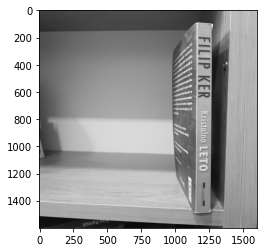

In [6]:
# MAIN
predictions = []

#with_books, no_books, test_set = load_sets() #ucitavanje slika
test_set = load_sets() #ucitavanje slika

for i in range(len(test_set)):
    image = preprocessing(test_set[i])
    br_slike = 37
    sl = i
    if sl == br_slike:
        slika = cv2.cvtColor(test_set[i], cv2.COLOR_GRAY2BGR)
    lines = cv2.HoughLines(image, 1, np.pi / 180, 200)
    
    if(type(lines) is type(None)):
        predictions.append(int(0))     
    elif(len(lines) == 0):
        predictions.append(int(0))  
    else:                                
        up_lines = []
        down_lines = []
        for line in lines:
            x1, y1, x2, y2 = find_line_coordinates(line)
            
            filter_up_lines(up_lines, x1, y1, x2, y2)
            filter_down_lines(down_lines, x1, y1, x2, y2)
            
        len_up_list, list_of_up_lines = up_lines_counter(up_lines)
        len_down_list, list_of_down_lines = down_lines_counter(down_lines)

        final_up_lines = 0
        final_down_lines = 0

        for i in range(len(len_up_list)):
            if(len_up_list[i]>1):
                final_up_lines = final_up_lines + 1
                [x1, y1, x2, y2] = list_of_up_lines[i][0]
                if sl == br_slike:
                    cv2.line(slika, (x1, y1), (x2, y2), (0, 255, 0), 10, cv2.LINE_AA)
                    # gornje su zelene


        for i in range(len(len_down_list)):
            if(len_down_list[i]>1):
                final_down_lines = final_down_lines + 1
                [x1, y1, x2, y2] = list_of_down_lines[i][0]
                if sl == br_slike:
                    cv2.line(slika, (x1, y1), (x2, y2), (0, 0, 255), 10, cv2.LINE_AA)
                    # donje su plave


        if(final_up_lines%2 == 0):
            final_up_books = final_up_lines / 2
        else:
            final_up_books = final_up_lines // 2 + 1


        if(final_down_lines%2 == 0):
            final_down_books = final_down_lines / 2
        else:
            final_down_books = final_down_lines // 2 


        final_books_count = final_up_books + final_down_books
        predictions.append(int(final_books_count))
        if sl == br_slike:
            plt.imshow(slika,  'gray')
            #print("---", int(final_books_count))
print(predictions)     
    
    

In [7]:
#POREDJENJE
solutions = []
with open('skup_podataka/test_podaci.csv', encoding="utf8", newline='\n') as f:
    lines = csv.reader(f, delimiter=',')
    for row in lines:
        if(row[0] != "br_knjiga"):
            solutions.append(int(row[0]))
            
    true = 0
    if(len(solutions) == len(predictions)):
        for i in range(len(solutions)):
            if(solutions[i] == predictions[i]):
                true = true + 1
    print((true/len(solutions))*100)

32.0
